
# Oxford NERC DTP Hackathon 2024 - ESA x CEH Challenge 
## Using Earth Observation data to support effective decision-making for UK droughts and heatwaves 

<img src="fig_challenge1.jpg" width=800 /> 
Your challenge is to use multiple sources of Essential Climate Variables derived from Earth Observation data (and potentially also from reanalysis data) to developing a tool as a product that you will pitch to your customer in the UK adapt to or mitigate against the impacts of droughts and extreme heat. For example, you may choose to develop a product to aid decision-making for farmers, city dwellers, urban planners or water companies. Depending on your chosen customer, you will explore which of their needs are currently unmet but could be addressed using Earth Observation data. 
As part of this challenge, you will also be able to design communication and dissemination strategies, to ensure that your customer gains access to the relevant data and information.

<b> How to use this notebook ? <b>
- The Notebooks provide example of routines coded in Python to illustrate the tool you will be pitching.
- This Notebook includes questions to guide you for creating indices related to extreme droughts using ESA-CCI data but can be adapted for heatwaves.
- You are welcome to edit and change the codes and use other datasets depending on your chosen application.

<b> Learning objectives of this Notebook :<b>

- Get acquainted with and use observational (and reanalysis) climate data (netCDF files)
- Learn about the different satellite-derived data, sensors and missions for producing Essential Climate Variables.
- Compute and identify extreme events from satellite-derived Essential Climate Variables.

## 1. Accessing Earth Observations ECVs data from ESA CCI 

Essential climate variables (ECVs) critically contribute to the characterisation of Earth' s climate, providing a picture of climate change at a global scale. Systematic observation of Earth’s climate is the fundamental basis upon which the UNFCCC was founded and the Paris Agreement adopted. The Global Climate Observing System (GCOS) currently specifies 55 ECVs, of which about 60 per cent can be addressed by satellite data.

<img src="cci_logo.png" width=800 /> 

Satellite observations are unique in providing global coverage and time series of consistent observation. ESA’s Climate Change Initiative (CCI) exploits the full satellite archive to develop the scientific basis and produce data records of the 27 ECVs that cover the whole world with some spanning more than 4 decades. https://climate.esa.int/data/

All ESA CCI data are accessible on the ESA CCI's Open Data Portal via the path:  <b> /neodc/esacci/  <b> 

In [29]:
#Relevant Libraries
import numpy as np
import xarray as xr
from glob import glob
import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.image as mpimg

- Selection of region of interest

In [30]:
 #Latitude from 50.10319 to 60.15456 and longitude from -7.64133 to 1.75159
lon_bnds, lat_bnds = (-8, 2), (49,61)
from functools import partial
def _preprocess(x, lon_bnds, lat_bnds):
    return x.sel(lon=slice(*lon_bnds), lat=slice(*lat_bnds))
partial_func = partial(_preprocess, lon_bnds=lon_bnds, lat_bnds=lat_bnds)

- Land Surface Temperature data access

This functions opens daily Land Surface Temperature data from start_year to end_year, for the summer months (JJAS)

In [3]:
(start_year,end_year)=(1996,2010)

In [4]:
years = np.arange(start_year,end_year+1)
MM=['06','07','08','09']
yearList=years.tolist()
path = "/neodc/esacci/land_surface_temperature/data/SSMI_SSMIS/L3C/v2.33/daily"
list_files = []
for year in yearList: 
     for m in MM:
         list_files += glob("{path}/*{year}/*{month}/*/*_ASC*.nc".format(path=path, year=year, month=m))
print("%s files opened"%(len(list_files)))
drop_variables = ['satze', 'solaz','sataz', 'solze', 'qual_flag']  # too much processing time, remove all variables not needed 
fileLST = xr.open_mfdataset(paths=list_files , drop_variables=drop_variables, combine='by_coords',  preprocess=partial_func)

1830 files opened


- Plotting Land Surface Temperature data 

In [5]:
#Accessing variables
fileLST

<xarray.Dataset>
Dimensions:                  (time: 1830, lat: 48, lon: 40, length_scale: 1)
Coordinates:
  * time                     (time) datetime64[ns] 1996-06-01 ... 2010-09-30
  * lat                      (lat) float32 49.12 49.38 49.62 ... 60.62 60.88
  * lon                      (lon) float32 -7.875 -7.625 -7.375 ... 1.625 1.875
Dimensions without coordinates: length_scale
Data variables:
    dtime                    (time, lat, lon) timedelta64[ns] dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
    lst                      (time, lat, lon) float32 dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
    lst_uncertainty          (time, lat, lon) float32 dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
    n                        (time, lat, lon) float32 dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
    lst_unc_ran              (time, lat, lon) float32 dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
    lst_unc_loc_atm          (time, lat, lon) float32 dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
    lst_unc_loc_sfc          (time, lat, lon) float32 dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
    lst_unc_sys              (time, length_scale) float32 dask.array<chunksize=(1, 1), meta=np.ndarray>
    lst_time_correction      (time, lat, lon) float32 dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
    lst_unc_time_correction  (time, lat, lon) float32 dask.array<chunksize=(1, 48, 40), meta=np.ndarray>
Attributes: (12/42)
    title:                      ESA LST CCI land surface temperature level L3...
    institution:                Estellus
    source:                     Satellite Application Facility on Climate Mon...
    history:                    Created using software developed at Estellus
    references:                 http://cci.esa.int/lst
    tracking_id:                ab5349e6-5080-4356-bc20-a73faf7320de
    ...                         ...
    geospatial_lat_units:       degrees_north
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.25
    geospatial_lon_resolution:  0.25
    doi:                        10.5285/a7e811fe11d34df5abac6f18c920bbeb
    product_version:            v2.33

In [6]:
lon=fileLST['lon']
lat=fileLST['lat']
lst_YY=fileLST['lst']

In [7]:
lst_mean=lst_YY.mean(dim='time') - 273.15

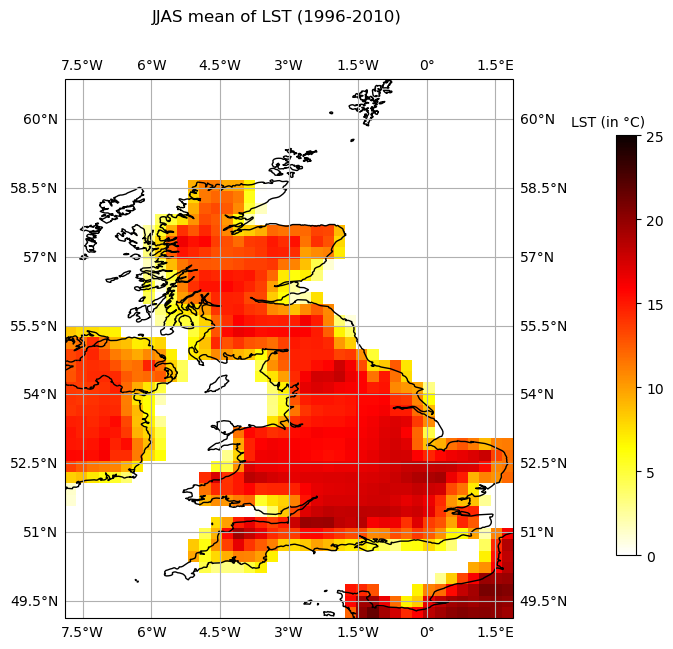

In [8]:
var, unit= 'LST','°C'
lonmin= lon.min()
lonmax= lon.max() 
latmin= lat.min()
latmax= lat.max()
import cartopy.feature as cf
fig, ax = plt.subplots(figsize=(10,7),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
im=ax.imshow(lst_mean, cmap='hot_r',  vmin=0, vmax= 25,origin='lower',  extent=[lonmin, lonmax, latmin, latmax])
cbar_ax = fig.add_axes([0.84, 0.2, 0.02, 0.6])
clb = fig.colorbar(im, cax=cbar_ax)
clb.set_label('%s (in %s)'%(var, unit), labelpad=-40, y=1.05, rotation=0)
plt.suptitle("JJAS mean of LST (%s-%s)"%( start_year, end_year))
plt.savefig('figname.png')

## 2. Accessing Reanalysis data from ERA 5 

For applications such as measuring the impact of heat for human populations may equire additional ECVs not provided by ESA's  Earth Observations such as relative humidity. For this, you could use ERA 5 reanalysis data.

Reanalysis data provide the most complete picture currently possible of past weather and climate. They are a blend of observations with past short-range weather forecasts rerun with modern weather forecasting models.

ERA5 is the fifth generation ECMWF atmospheric reanalysis of the global climate covering the period from January 1940 to present. ERA5 is produced by the Copernicus Climate Change Service (C3S) at ECMWF. It provides hourly estimates of a large number of atmospheric, land and oceanic climate variables. The data cover the Earth on a 31km grid and resolve the atmosphere using 137 levels from the surface up to a height of 80km. ERA5 includes information about uncertainties for all variables at reduced spatial and temporal resolutions.

All ESA CCI data are accessible on JASMIN's CEDA Archive via the path: <b> /badc/ecmwf-era5/data/oper/an_sfc <b>

## 3. Plotting drought Index from CCI data 

### 3.1 The Soil Moisture Drought Index 

The Climate Change Initiative hosts the Soil Moisture Essential Climate Variabe dataset which can be used to create and index of drought severity called drought index. In this example we show how to use the soil moisture data to create this drought indicator. You can then iddentify if the results of this drought indicator constructed from ESA-CCI data is suitable to identify past extreme drought events in the UK. 

This exercise can be adapted for heatwaves metrics as well, for more information on extreme heat indices datasets and definition, look at the 
Appendix Ion the following link  https://confluence.ecmwf.int/display/CKB/Climate+extreme+indices+and+heat+stress+indicators+derived+from+CMIP6+global+climate+projections%3A+Product+User+Guidel

<img src="fig2_challenge1.png" width=800 /> 

The first step to compute the drought index will be to extract soil moisture for the agricultural area.
For this, we need to create a mask based on the land cover class

In [60]:
file_LC= xr.open_dataset("../data/ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7b.nc")#, drop_variables=drop_variables)
print(file_LC)

<xarray.Dataset>
Dimensions:              (lat: 64800, lon: 129600)
Coordinates:
  * lat                  (lat) float32 90.0 90.0 89.99 ... -89.99 -90.0 -90.0
  * lon                  (lon) float32 -180.0 -180.0 -180.0 ... 180.0 180.0
Data variables:
    lccs_class           (lat, lon) float32 ...
    processed_flag       (lat, lon) float32 ...
    current_pixel_state  (lat, lon) float32 ...
    observation_count    (lat, lon) float32 ...
    change_count         (lat, lon) float32 ...
    crs                  int32 ...
Attributes: (12/38)
    title:                      ESA CCI Land Cover Map
    summary:                    This dataset contains the global ESA CCI land...
    type:                       ESACCI-LC-L4-LCCS-Map-300m-P1Y
    id:                         ESACCI-LC-L4-LCCS-Map-300m-P1Y-2015-v2.0.7
    project:                    Climate Change Initiative - European Space Ag...
    references:                 http://www.esa-landcover-cci.org/
    ...                         .

In [61]:
LCDset=file_LC.sel(lat=slice(61, 49), lon=slice(-8, 2))

In [62]:
lcc= LCDset.data_vars['lccs_class']
lcc

<xarray.DataArray 'lccs_class' (lat: 4320, lon: 3600)>
[15552000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 61.0 61.0 60.99 60.99 60.99 ... 49.01 49.01 49.0 49.0
  * lon      (lon) float32 -7.999 -7.996 -7.993 -7.99 ... 1.99 1.993 1.996 1.999
Attributes:
    long_name:            Land cover class defined in LCCS
    standard_name:        land_cover_lccs
    flag_values:          [   0   10   11   12   20   30   40   50   60   61 ...
    flag_meanings:        no_data cropland_rainfed cropland_rainfed_herbaceou...
    valid_min:            1
    valid_max:            220
    ancillary_variables:  processed_flag current_pixel_state observation_coun...

In [63]:
# print the land cover attributes (note: we need to split nameing at whitespace) and search for
for val,flag in zip(LCDset.lccs_class.attrs["flag_values"],LCDset.lccs_class.attrs["flag_meanings"].split()):
     print(val,flag)

#Let's make a list of the classes we're interested
import re
# in this case let's gather all classes which have 'crop' in it's name
agriclasses = [val for val,flag in zip(LCDset.lccs_class.attrs["flag_values"], LCDset.lccs_class.attrs["flag_meanings"].split()) if re.search('cropland',flag)]

# create  a mask 
mask = LCDset.lccs_class.isin(agriclasses)

0 no_data
10 cropland_rainfed
11 cropland_rainfed_herbaceous_cover
12 cropland_rainfed_tree_or_shrub_cover
20 cropland_irrigated
30 mosaic_cropland
40 mosaic_natural_vegetation
50 tree_broadleaved_evergreen_closed_to_open
60 tree_broadleaved_deciduous_closed_to_open
61 tree_broadleaved_deciduous_closed
62 tree_broadleaved_deciduous_open
70 tree_needleleaved_evergreen_closed_to_open
71 tree_needleleaved_evergreen_closed
72 tree_needleleaved_evergreen_open
80 tree_needleleaved_deciduous_closed_to_open
81 tree_needleleaved_deciduous_closed
82 tree_needleleaved_deciduous_open
90 tree_mixed
100 mosaic_tree_and_shrub
110 mosaic_herbaceous
120 shrubland
121 shrubland_evergreen
122 shrubland_deciduous
-126 grassland
-116 lichens_and_mosses
-106 sparse_vegetation
-105 sparse_tree
-104 sparse_shrub
-103 sparse_herbaceous
-96 tree_cover_flooded_fresh_or_brakish_water
-86 tree_cover_flooded_saline_water
-76 shrub_or_herbaceous_cover_flooded
-66 urban
-56 bare_areas
-55 bare_areas_consolidated
-54 

In [2]:
# Open the data for the climatology:
(start_year2,end_year2)=(2000,2020)

In [3]:
 #Latitude from 50.10319 to 60.15456 and longitude from -7.64133 to 1.75159
lon_bnds2, lat_bnds2= (-8, 2), (61,49)
partial_func2 = partial(_preprocess, lon_bnds=lon_bnds2, lat_bnds=lat_bnds2)

NameError: name 'partial' is not defined

In [ ]:
years2 = np.arange(start_year2,end_year2+1)
yearList2=years2.tolist()
pathSM = "/neodc/esacci/soil_moisture/data/daily_files/COMBINED/v08.1"
list_filesSM = []
for year in yearList2: 
    list_filesSM += glob("{path}/*{year}/*.nc".format(path=pathSM, year=year))
print("%s files opened"%(len(list_filesSM)))
file_SM = xr.open_mfdataset(paths=list_filesSM , combine='by_coords',  preprocess=partial_func2)

In [37]:
# Open the data for the climatology of soil moisture 
smClim=file_SM['sm']
smClim

<xarray.DataArray 'sm' (time: 2192, lat: 48, lon: 40)>
dask.array<concatenate, shape=(2192, 48, 40), dtype=float32, chunksize=(1, 48, 40), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1985-12-31
  * lat      (lat) float64 60.88 60.62 60.38 60.12 ... 49.88 49.62 49.38 49.12
  * lon      (lon) float64 -7.875 -7.625 -7.375 -7.125 ... 1.375 1.625 1.875
Attributes:
    _CoordinateAxes:      time lat lon
    ancillary_variables:  sm_uncertainty flag t0
    dtype:                float32
    long_name:            Volumetric Soil Moisture
    units:                m3 m-3
    valid_range:          [0. 1.]

In [1]:
smMonDset=file_SM.resample(time="MS").mean()
smMonDset

NameError: name 'file_SM' is not defined

In [39]:
#Create a monthly SM climatology array
def to_monthly(ds):
    year = ds.time.dt.year
    month = ds.time.dt.month

    # assign new coords
    ds = ds.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return ds.set_index(time=("year", "month")).unstack("time")  
smMon=to_monthly(smMonDset['sm'])

In [40]:
smMon

<xarray.DataArray 'sm' (lat: 48, lon: 40, year: 6, month: 12)>
dask.array<reshape, shape=(48, 40, 6, 12), dtype=float32, chunksize=(48, 40, 1, 12), chunktype=numpy.ndarray>
Coordinates:
  * year     (year) int64 1980 1981 1982 1983 1984 1985
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * lat      (lat) float64 60.88 60.62 60.38 60.12 ... 49.88 49.62 49.38 49.12
  * lon      (lon) float64 -7.875 -7.625 -7.375 -7.125 ... 1.375 1.625 1.875
Attributes:
    _CoordinateAxes:      time lat lon
    ancillary_variables:  sm_uncertainty flag t0
    dtype:                float32
    long_name:            Volumetric Soil Moisture
    units:                m3 m-3
    valid_range:          [0. 1.]

### 3.2 Creating a mask of crop areas 

In [65]:
#interpolate mask onto the soil moisture grid so it can be more easily applied
masksm = mask.astype(int).interp(lat=file_SM.lat, lon=file_SM.lon, method='nearest')
masksm = masksm.where(masksm == 1) # set the 0 values to Nan (not a numbers)

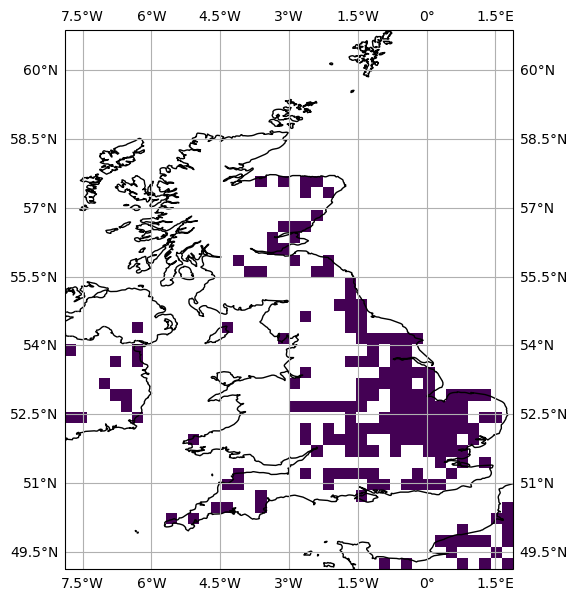

In [66]:
# you can make a plot of the mask if you're interested
fig, ax = plt.subplots(figsize=(10,7),
                      subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.set_extent([lonmin, lonmax, latmin, latmax], crs=ccrs.PlateCarree())
ax.gridlines(draw_labels=True)
ax.set_xlabel('longitude')
ax.set_ylabel('latitude')
plt.imshow(masksm, extent=[lonmin, lonmax, latmin, latmax])

### 3.3 Computing the Soil Moisture Deficit Index (SMDI)

For soil moisture the method we will use is called the Soil moisture deficit index (SMDI). It is an index where the soil moisture of previous months are used to calculate the SMDI of the actual month.

Variables
1. ${SMDI}_j$= soil moisture deficit index of the month j
2. ${SMDI}_{j-1}$= SMDI at month j-1 (previous month) 
3. $SD_j$ = monthly soil deficit at month j  
4. $SW_j$ = actual monthly soil moisture at month j.The is the soil moiture map corresponding to a certain map
5. $MSW_j$= long-term monthly **median** available soil water at month j. There will be 12 maps, one per month.
6. $maxSW_j$= long-term monthly **maximum** available soil water at month j. There will be 12 maps, one per month.
7. $minSW_j$ = long-term monthly **minimum** available soil water at month j. There will be 12 maps, one per month.
8. NOTE: $_{j-1}$ stands for the month previous to month j.

**The sequence of the equations are**:
1. Calculate: $MSW_j$, $maxSW_j$, $minSW_j$
2. Calculate the monthly soil deficit for the month j
$$SD_j = (SW_j – MSW_j)/(maxSW_j – SW_j) *100,\quad  if  SWj > MSWj$$ 
$$SD_j= (SW_j – MSW_j)/(MSW_j – minSW_j)* 100,\quad  if  SW_j =< MSW_j$$ 
3. Calculate the soil moisture deficit index dor the month 1 (estimated and initial value)
$SMDI_1 = SD_1/50$  for initial month 
4. Calculate the soil moistiure deficit index for all the other months
$${SMDI}_j= 0.5 * {SMDI}_{j-1}+SD_j/50$$

The $SMDI_j$ value varies from -4 to 4 being the negatives indicators of drought. Persistant drought can be detected by monthly accumulation of negatives SMDI giving room to a number of analysis.

In [41]:
# Compute the monthly climatologies of the mean (smMean), median(smMed), mimimum (smMin) and maximum (smMax) of Soil Moisture data
smmean=smMon.mean(dim='year')
smMed=smMon.median(dim='year')
smMin=smMon.min(dim='year')
smMax=smMon.max(dim='year')

In [42]:
smMonDset.sm.shape

(72, 48, 40)

In [ ]:
smClim = file_SM.sm.groupby("time.month")

## Exercise to do : compute the Soil Moisture deficit index 

In [2]:
#smdIndex = ...
#for ... in ...:
    #Monthly anomaly w.r.t. long term climatological median
    #print(f"Compute Soil moisture deficit for {i}, {str(dt)}", end='\r')

Create a simple time series plot of a location

In [73]:
ilon = 0.19
ilat = 51

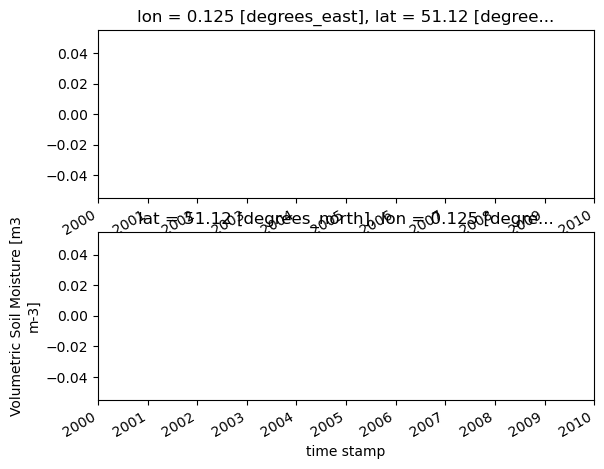

In [74]:
#plt.figure()
fig, axes = plt.subplots(nrows=2, ncols=1)
ploc1 = smdIndex.sel(lat=ilat, lon=ilon, method="nearest").plot(ax=axes[0])
ploc2 = smMonDset.sm.sel(lat=ilat, lon=ilon, method="nearest").plot(ax=axes[1])

Create a geographical plot at a certain month

Plotting epoch 1980-08-01T00:00:00.000000000


Text(0.5, 1.0, 'Soil moisture deficit index at 1980-08-01')

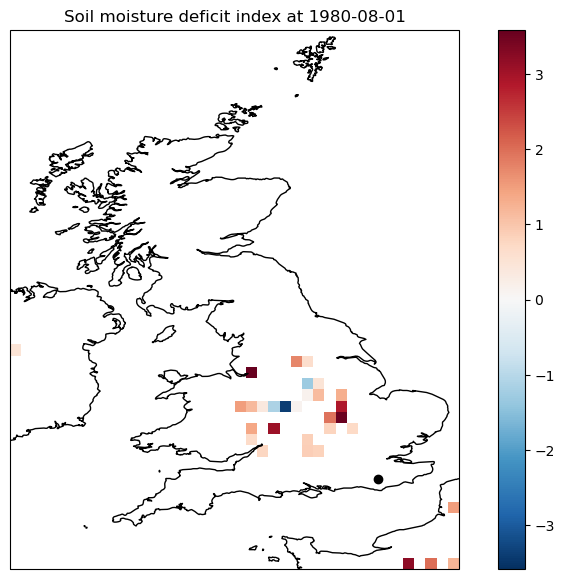

In [75]:
# Create a geographical plot at a certain month
it = 7
epoch = smdIndex.time[it].data
print(f"Plotting epoch {str(epoch)}")

fig, ax = plt.subplots(figsize=(10,7),
                      subplot_kw={'projection': ccrs.PlateCarree()})
p = smdIndex.sel(time=epoch).plot(ax=ax, transform=ccrs.PlateCarree())

#also plot the location relevant for the plot above
ax.scatter([ilon], [ilat], transform=ccrs.PlateCarree(), color="black")
p.axes.coastlines()
p.axes.set_title(f"Soil moisture deficit index at {(str(epoch)[:10])}")

Questions to guide you :

- Create a time plot of the monthly mean of the SMDI
- Identify the very dry areas by identifying a consecutive number of months of negative SMDIj.
- Create a plot during the drought period at certain key locations. For this, you can use the EM-DATA disaster database to identify key extreme drought events: https://www.emdat.be/ 
- Identify the year, and the months of the very dry area in the UK.
- Look at the anomalies during the extreme events. 
- Check out the 'https://foodsecurityindex.eiu.com/Country' and determine the Global food security index for the UK
- Do an online search for drought indicators, can you find other types of drought indicators? What data do they ingest?

Bonus programming questions:

- Instead of looking at a single point, can you try to average the SMDI over a region (e.g. select a set of neighbouring gridpoints), and plot that one instead?
- Try making a matplotlib animation of the SMDI over time